In [1]:
#Trigger-Setting ofdmfft|source_sop either edge
import numpy as np  
import matplotlib.pyplot as plt
from signaldump import signaltapCsvDumper
import seaborn
plt.rcParams['figure.figsize']=[10,10]
import csv
import CommonScript as cs
import matplotlib.animation as animation
from bitstring import BitArray

0x363f5b293c94ccf403eb3d8666000000


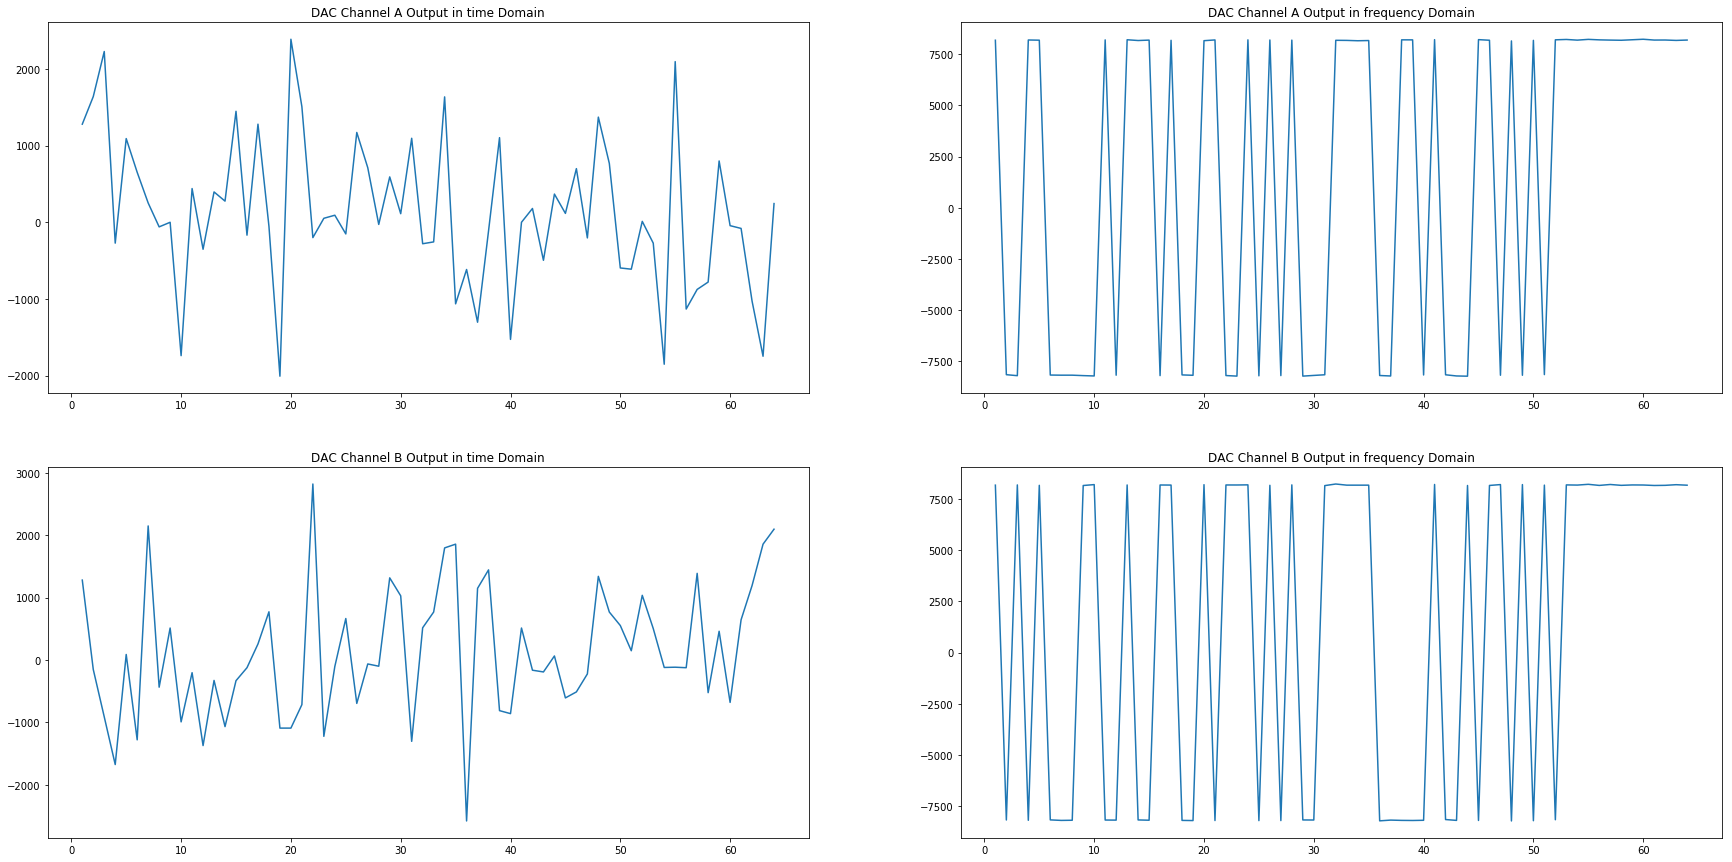

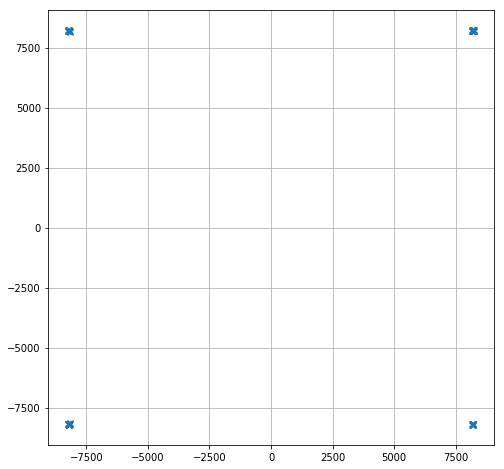

In [53]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=["DA\[(\d+)\]","DB\[(\d+)\]"],condition="active-high",validPattern=["ofdmdaccontrol|asi_in0_valid"],outputName="TransiverDAOutput",unsigned=True)
with open('./TransiverDAOutput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    real = np.array(csvBuffer[0],dtype=int)[::20]-8192
    imag = np.array(csvBuffer[1],dtype=int)[::20]-8192
    outSignal = real + imag*1j
    frequencyDomain=np.fft.fft(outSignal)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-')

    plt.title('DAC Channel B Output in frequency Domain')

fftResult  = frequencyDomain
demodReal=np.real(fftResult)
demodImag=np.imag(fftResult)

plt.figure(figsize=(8,8))
plt.grid(True,axis='both',which='major')
plt.scatter(demodReal,demodImag,marker='x')

demodOut = cs.ConstellationDeMapping(demodReal,demodImag)

print(hex(int(demodOut,2)))
sendData = int(demodOut,2)


[  537   711  1363  -232  1259  1123   762   269    25 -1514   245  -204
   586   560  1349  -190   697  -451 -1835  1997  1668   544   714   464
  -118   586    61  -437   280   159  1114    64    47  1480  -688  -313
  -849    41   862 -1381  -272  -122  -505   406   409   956   189  1290
   658  -495  -487    77  -136 -1444  1540 -1155  -944  -687   889   536
   678  -162 -1072    55]
[  700     2  -177  -591   712  -697  1654  -616   150  -844    13  -788
   -25  -822  -440  -332   128   850  -303  -140    50  2506 -1123  -524
    13  -882   -38   250  1548  1317  -653   632   710  1468  1492 -2041
   870  1007  -838  -802   441   115   262   513  -118  -229  -188   943
   484   395   149   869   373  -195  -172   -35  1398    98   948  -113
   577   589   822  1004]
0x363f5b293c94ccf403eb3d866600d300
0.0


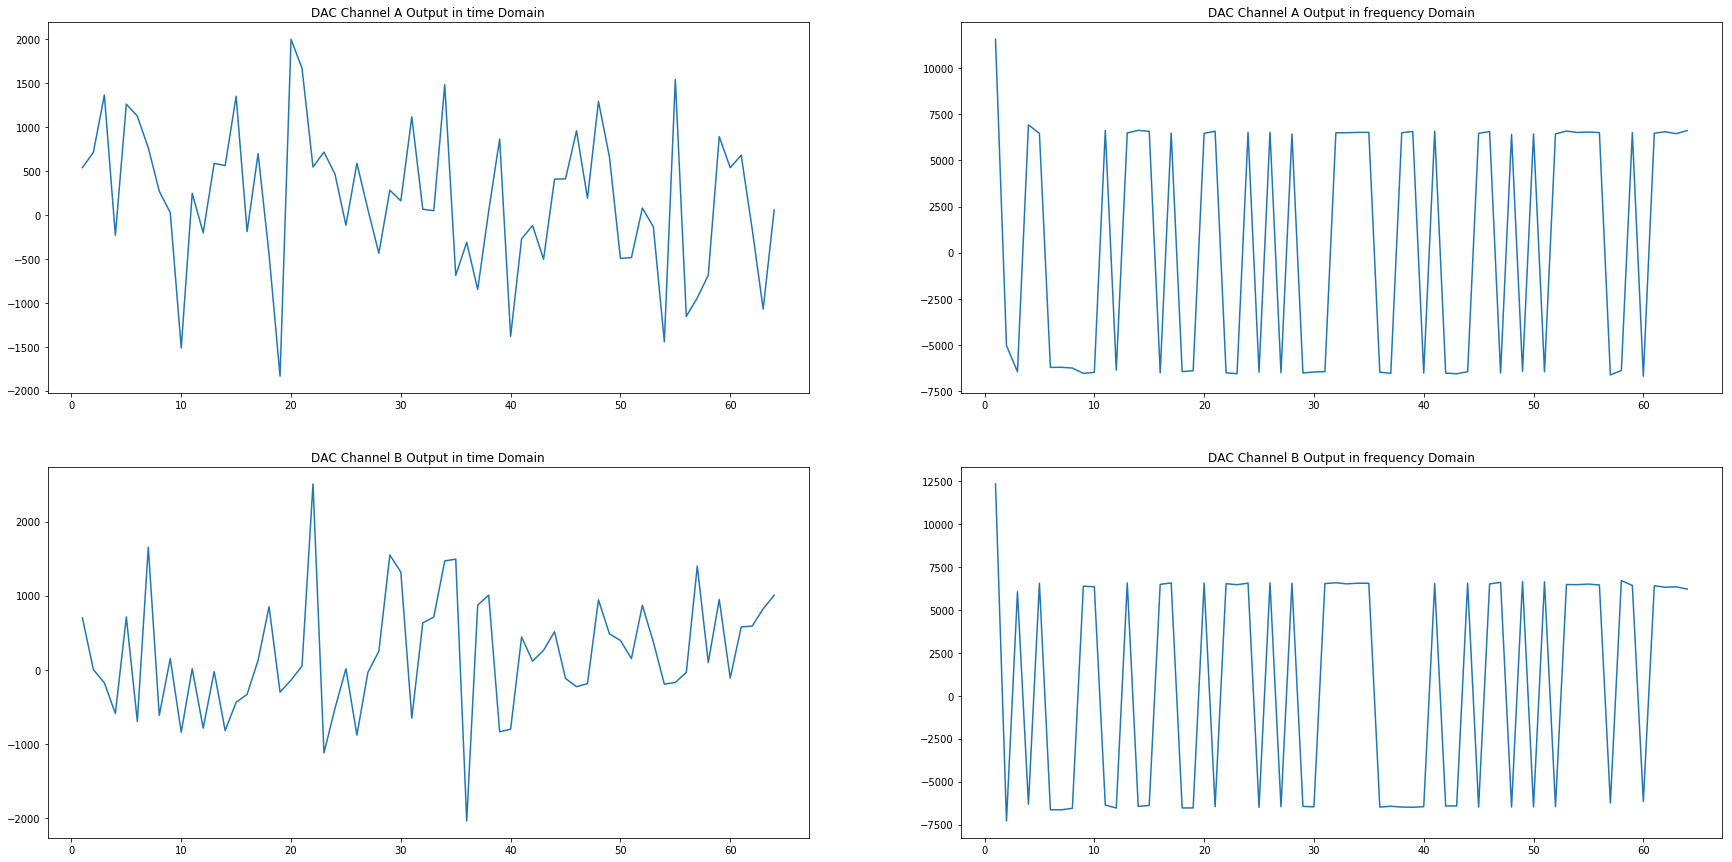

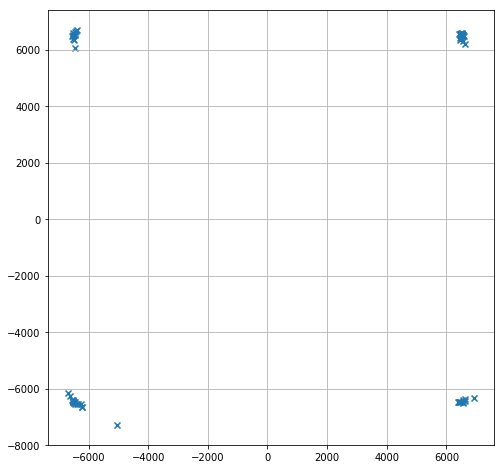

In [42]:
def symbolSync(series):
    accu_flag=0
    ma1=0
    ma2=0
    ma1_accu=0
    ma2_accu=0
    v2=0
    v1=0
    th=100
    for v,i in enumerate(real):
        ma1_accu=ma1_accu+i
        ma2_accu=ma2_accu+i
        if(v2==3):
            ma2=ma2_accu//4
#             print(ma2,ma2-ma1)
            if(accu_flag):
                if(abs(ma1-ma2)>th):
                    return v+8
            v2=0
            ma2_accu=0
        else:
            v2=v2+1
        if(v1==31):
            accu_flag=1
            ma1=ma1_accu//32
            v1=0
            ma1_accu=0
        else:
            v1=v1+1
   
dumper.dumpSession(signalPattern=["ADA_D\[(\d+)\]","ADB_D\[(\d+)\]"],condition="range",inf=0,sup=4000,outputName="ReceiverADInput")

with open('./ReceiverADInput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    real = np.negative(np.array(csvBuffer[0],dtype=int))
    imag = np.negative(np.array(csvBuffer[1],dtype=int))
    reagIndex=symbolSync(real)
    imagIndex=symbolSync(imag)
    real = real[reagIndex:reagIndex+1279:20]
    imag = imag[imagIndex:imagIndex+1279:20]
    print(real)
    print(imag)
    outSignal = real + imag*1j
    frequencyDomain=np.fft.fft(outSignal)
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-')

    plt.title('DAC Channel B Output in frequency Domain')

    fftResult  = frequencyDomain
    demodReal=np.real(fftResult)
    demodImag=np.imag(fftResult)

    plt.figure(figsize=(8,8))
    plt.grid(True,axis='both',which='major')
    plt.scatter(demodReal[1:],demodImag[1:],marker='x')

    demodOut = cs.ConstellationDeMapping(demodReal,demodImag)
    #Calculate BER
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)



            
        
        
    



128
[  107   715  1361  -229  1267  1128   768   270    22 -1527   250  -209
   590   567  1360  -194   691  -463 -1845  2012  1670   546   718   472
  -115   590    62  -444   286   162  1117    66    48  1489  -691  -310
  -855    48   874 -1388  -270  -121  -500   410   414   961   187  1298
   660  -499  -489    74  -129 -1454  1548 -1164  -946  -684   891   539
   688  -164 -1076    56]
[   30     4  -175  -589   706  -697  1668  -620   153  -851    16  -787
   -24  -817  -440  -331   127   854  -305  -145    50  2517 -1126  -531
    13  -886   -46   251  1559  1320  -660   628   715  1471  1495 -2048
   873  1006  -838  -807   443   116   266   511  -118  -229  -190   948
   489   396   147   873   377  -195  -171   -35  1398   100   956  -112
   582   595   827  1004]
0x363f5b293c94ccf403eb3d866600d300
0.0


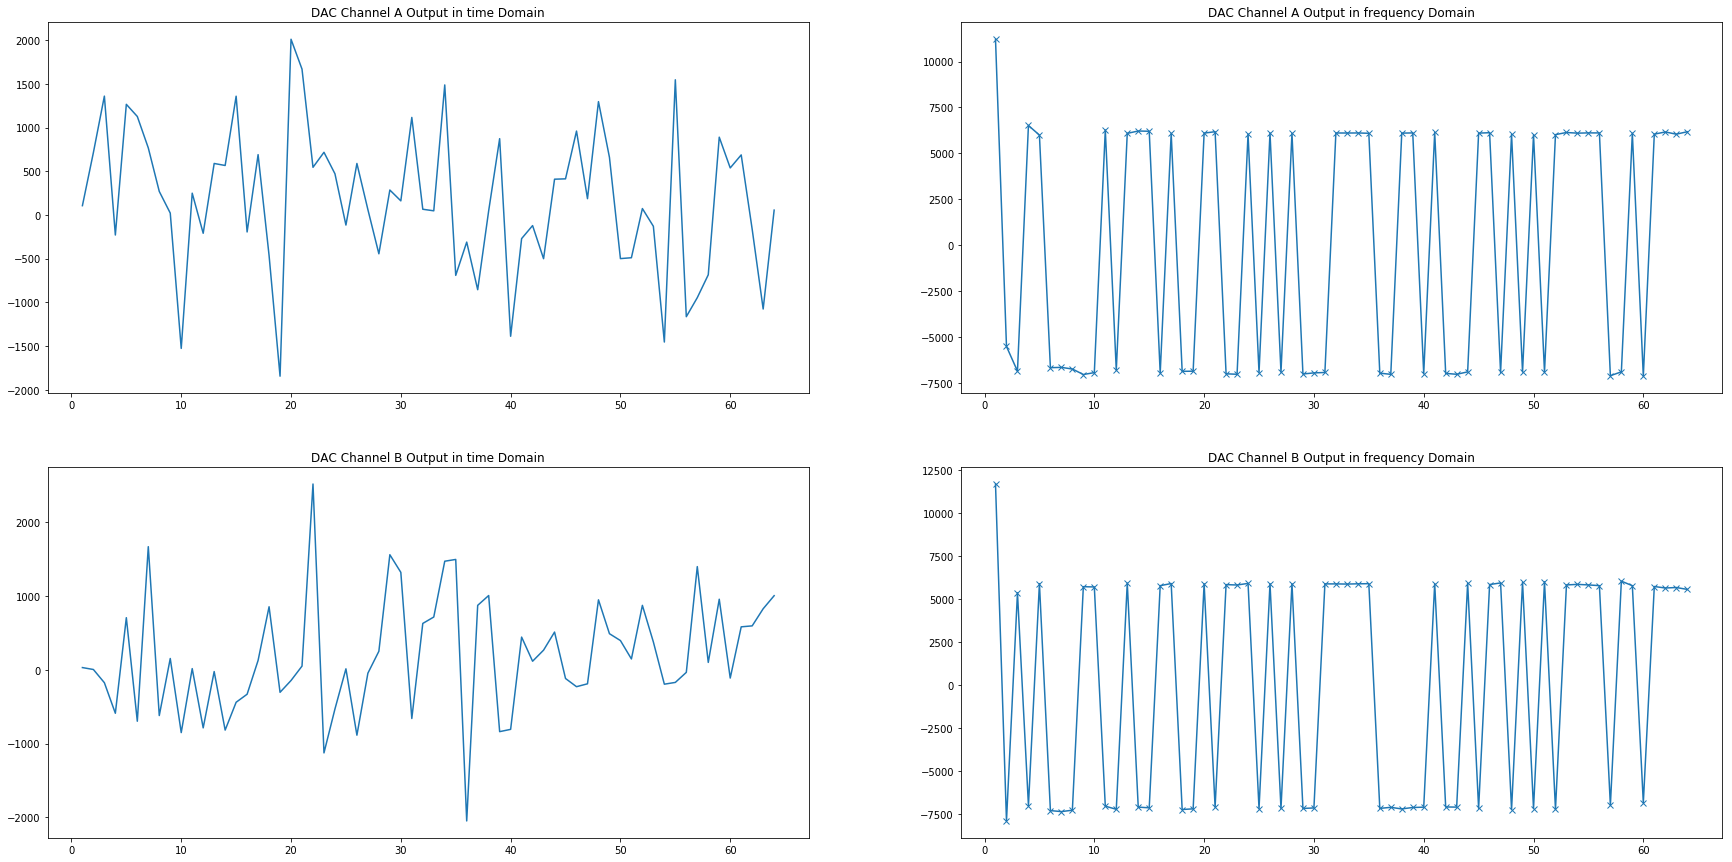

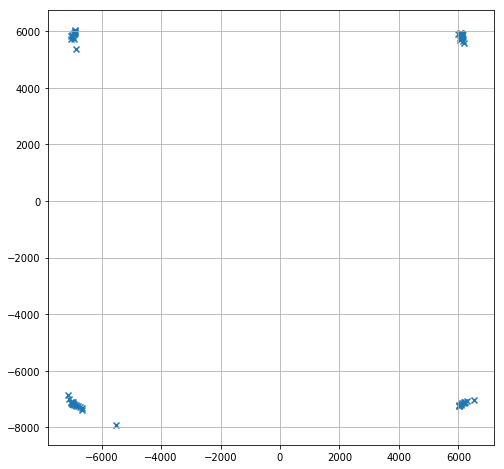

In [43]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=["ofdmsymbolsync\|aso_out0_data\[(\d+)\]"],condition="active-high",validPattern=["ofdmsymbolsync|aso_out0_valid"],outputName="ReceiverSyncOutput")
with open('./ReceiverSyncOutput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    data = np.array(csvBuffer[0],dtype=int)
    data = [np.binary_repr(i,width=32) for i in data]
    real = np.array([BitArray(bin=i[0:16]).int for i in data])
    imag = np.array([BitArray(bin=i[16:]).int for i in data])
    print(real.size)

    real = real[0::2]
    imag = imag[0::2]
    print(real)
    print(imag)
    outSignal = real + imag*1j
    frequencyDomain=np.fft.fft(outSignal)
    #frequencyDomain+=frequencyDomain[0]
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-x')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-x')

    plt.title('DAC Channel B Output in frequency Domain')

    fftResult  = frequencyDomain
    demodReal=np.real(fftResult)
    demodImag=np.imag(fftResult)

    plt.figure(figsize=(8,8))
    plt.grid(True,axis='both',which='major')
    plt.scatter(demodReal[1:],demodImag[1:],marker='x')

    demodOut = cs.ConstellationDeMapping(demodReal[1:],demodImag[1:])
    #Calculate BER
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)


[  107   715  1361  -229  1267  1128   768   270    22 -1527   250  -209
   590   567  1360  -194   691  -463 -1845  2012  1670   546   718   472
  -115   590    62  -444   286   162  1117    66    48  1489  -691  -310
  -855    48   874 -1388  -270  -121  -500   410   414   961   187  1298
   660  -499  -489    74  -129 -1454  1548 -1164  -946  -684   891   539
   688  -164 -1076    56]
[   30     4  -175  -589   706  -697  1668  -620   153  -851    16  -787
   -24  -817  -440  -331   127   854  -305  -145    50  2517 -1126  -531
    13  -886   -46   251  1559  1320  -660   628   715  1471  1495 -2048
   873  1006  -838  -807   443   116   266   511  -118  -229  -190   948
   489   396   147   873   377  -195  -171   -35  1398   100   956  -112
   582   595   827  1004]
sendData: 0x363f5b293c94ccf403eb3d866600d300
sendData: 0x363f5b293c94ccf403eb3d866600d300
0x363f5b293c94ccf403eb3d866600d300
0.0


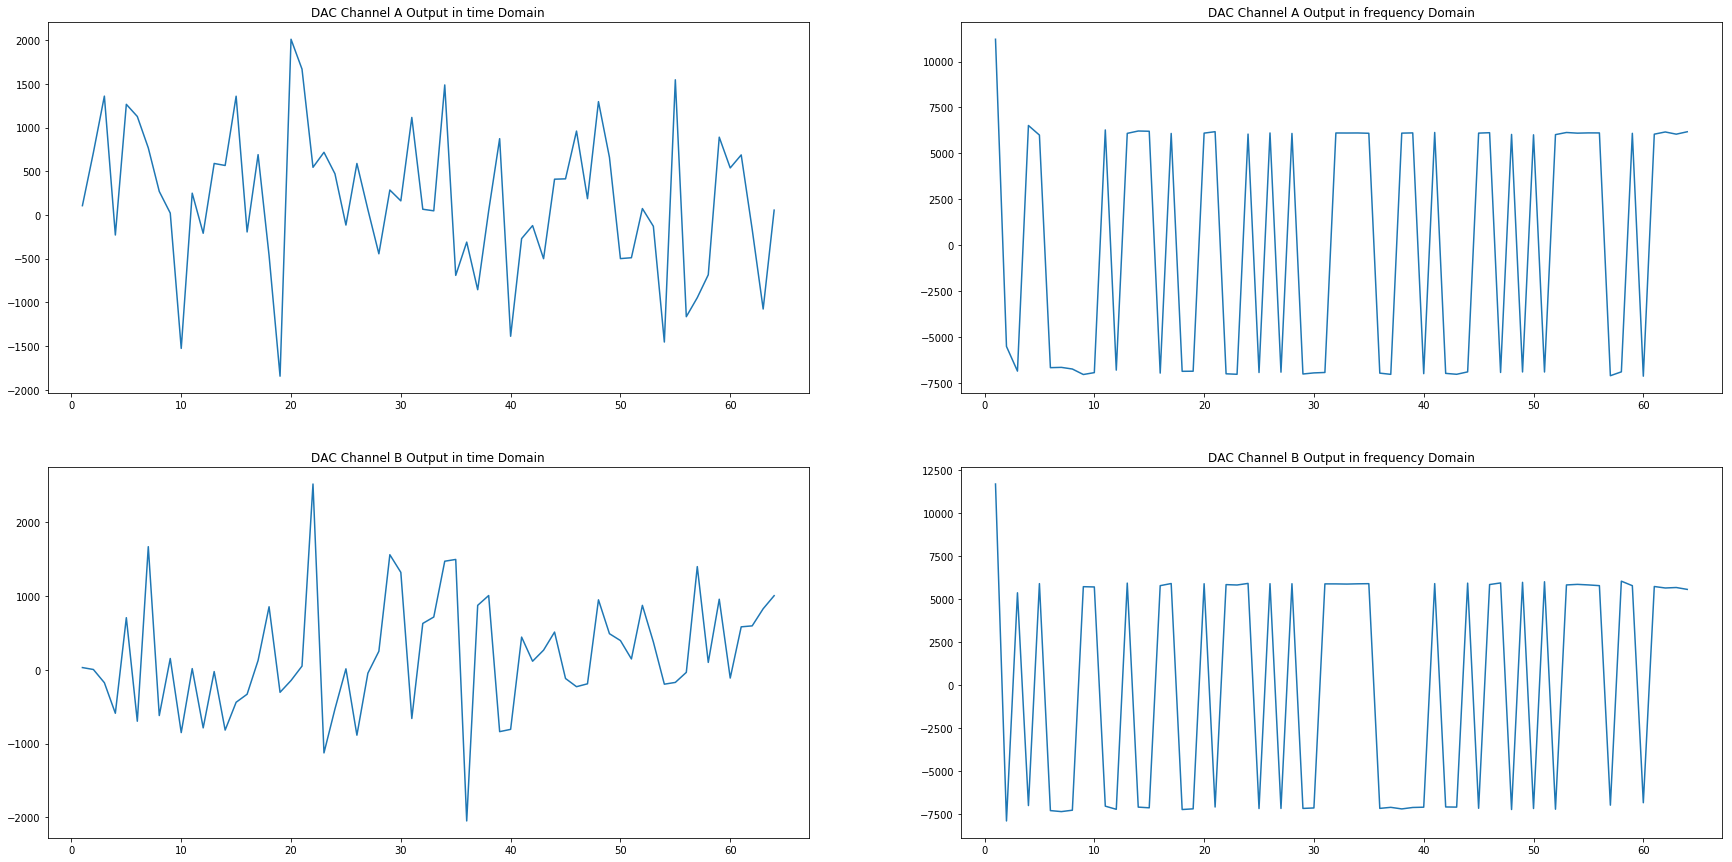

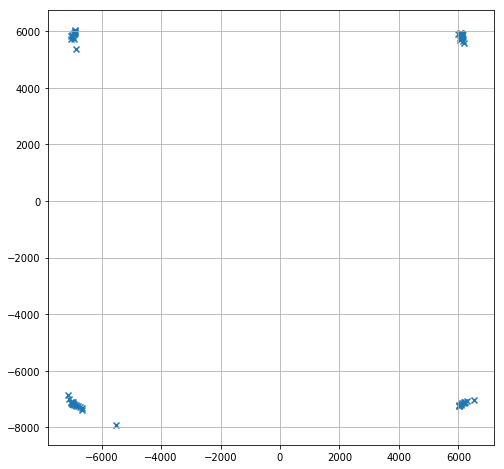

In [44]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=[".*ReceiverTopQsys_0_FFT:fft\|sink_real\[(\d+)\]",".*ReceiverTopQsys_0_FFT:fft\|sink_imag\[(\d+)\]"],condition="active-high",validPattern=["ReceiverTopQsys_0_FFT:fft|sink_valid"],outputName="RXFFTInput")
with open('./RXFFTInput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    data = np.array(csvBuffer,dtype=int)
    real=data[0][::2]
    imag=data[1][::2]

    print(real)
    print(imag)
    outSignal = real + imag*1j
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-')

    plt.title('DAC Channel B Output in frequency Domain')

    fftResult  = frequencyDomain
    demodReal=np.real(fftResult)
    demodImag=np.imag(fftResult)

    plt.figure(figsize=(8,8))
    plt.grid(True,axis='both',which='major')
    plt.scatter(demodReal[1:],demodImag[1:],marker='x')

    demodOut = cs.ConstellationDeMapping(demodReal[1:],demodImag[1:])
    #Calculate BER
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
    print("sendData:",hex(sendData))
    print("sendData:",hex(receiveData))
    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)


[ 703 -345 -428  407  377 -418 -414 -423 -440 -433  393 -426  382  389
  388 -436  381 -431 -430  382  387 -437 -439  378 -434  382 -432  380
 -439 -434 -433  381  382  381  381 -435 -440  382  382 -438  385 -437
 -439 -431  382  383 -433  377 -432  377 -431  377  384  381  383  383
 -445 -430  382 -446  380  386  378  386]
[ 733 -495  337 -439  370 -457 -462 -457  358  358 -441 -453  371 -443
 -446  362  370 -451 -451  369 -444  365  364  370 -450  369 -449  370
 -450 -449  367  368  368  369  370 -450 -444 -450 -446 -446  370 -444
 -444  372 -450  366  371 -452  375 -449  377 -452  364  366  364  363
 -438  379  362 -429  359  354  356  348]
0x363f5b293c94ccf403eb3d866600d300
0x363f5b293c94ccf403eb3d866600d300
0.0


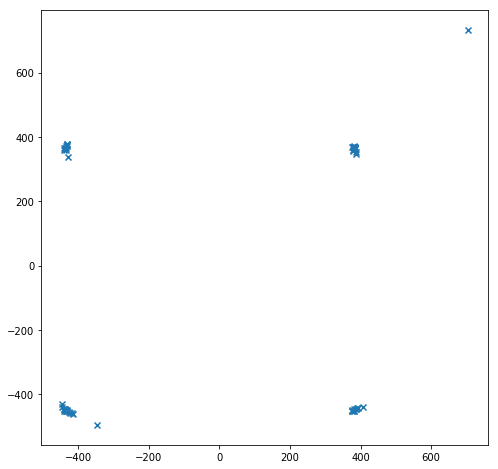

In [45]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=[".*ReceiverTopQsys_0_FFT:fft\|source_real\[(\d+)\]",".*ReceiverTopQsys_0_FFT:fft\|source_imag\[(\d+)\]"],condition="active-high",validPattern=["ReceiverTopQsys_0_FFT:fft|source_valid"],outputName="RXFFTOutput")
with open('./RXFFTOutput.csv') as fp:
    csvBuffer=list(csv.reader(fp))
    data = np.array(csvBuffer,dtype=int)
    real=data[0][::2]
    imag=data[1][::2]
    plt.figure(figsize=(8,8))
    plt.scatter(real,imag,marker='x')
    print(real)
    print(imag)


    demodOut = cs.ConstellationDeMapping(real[1:],imag[1:])
    #Calculate BER
    print(hex(int(demodOut,2)))
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
  

    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)
